**PART 8 - DSIM project**

**Authors:** Francesca De Cola, Valentina Moretto, Valentina Zangirolami

In this notebook, we concerned to content based image retrieval.

Our goal is to find our three faces on our dataset create in creation_dataset.

**Load packages**

In [ ]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import random as rnd
import keras_vggface
import keras

from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras.models import Model, load_model
from tensorflow.keras.preprocessing import image as kimage

from sklearn.neighbors import KDTree, BallTree
import joblib

from shutil import copyfile
import tarfile

from matplotlib import pyplot as plt
from time import time

Using TensorFlow backend.
C:\Users\valen\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\valen\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\valen\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\valen\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

**Import features**

In [ ]:
data=np.load("C:/Users/valen/Desktop/magistrale/DSIM/dataset_imgs.npz")
img=data['X']

**Load model**

We use vggface for feature extraction.

In [ ]:
net = VGGFace(include_top = False, input_shape = (224, 224, 3), pooling='max',model='senet50')

In [ ]:
net.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_1[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
__________________________________________________________________________________________________
max_poolin

Follow function is used to compute feature extraction on dataset, we cut vggface to layer global_average_pooling_2d_14

In [ ]:
def feature_extraction(img):
    img=img.astype('float64')
    img=preprocess_input(img,version=2)
    model = Model(inputs = net.input, outputs = net.get_layer('global_average_pooling2d_14').output)
    f=model.predict(img)
    return f

In [ ]:
features_data= feature_extraction(img)
features_data.shape

(2269, 2048)

**KDTree**

We consider KDTree to compute image retrieval. It used euclidean distance (default) to measure the similarity within images. Initially, we pass the dataset used after to search similar images to query image.

In [ ]:
tree= KDTree(features_data)

**Load query**

<function matplotlib.pyplot.show(*args, **kw)>

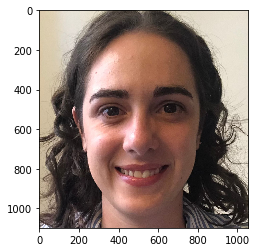

In [ ]:
img_query=kimage.load_img('C:/Users/valen/Desktop/magistrale/DSIM/vale_happy.jpeg')
plt.imshow(img_query); plt.show

Follow instruction compute feature extraction for query image.

In [ ]:
def fe_query(img):
    x=kimage.img_to_array(img)
    x=preprocess_input(x,version=2)
    x= np.expand_dims(x, axis=0)
    x= np.resize(x, [1, 224, 224, 3])
    model = Model(inputs = net.input, outputs = net.get_layer('global_average_pooling2d_14').output)
    x=model.predict(x)
    return x

In [ ]:
img_query_ex = fe_query(img_query)
img_query_ex.shape

(1, 2048)

We search the first 10 images more similar to query image (with minimum distance).

In [ ]:
dist, ind = tree.query(img_query_ex, k=10)

In [ ]:
dist

array([[10.62938917, 11.07956424, 11.2433765 , 11.45854118, 11.58233457,
        11.67675737, 11.78286296, 11.79602864, 11.81427028, 11.83760515]])

After we plot first 10 similar images:

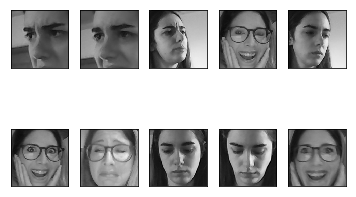

In [ ]:
x_imgs=data['X']
j=0
for i in ind[0]:
    ax = plt.subplot(2, 5, j + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    j+=1
    plt.imshow(x_imgs[i][:,:,::-1])

Now, we try to change metric with manhattan distance.

In [ ]:
tree1= KDTree(features_data, metric='manhattan')
dist, ind = tree1.query(img_query_ex, k=10)
dist

array([[369.60713666, 385.63602361, 412.6809757 , 422.97067841,
        423.82525077, 432.03130298, 432.69210813, 433.85401215,
        434.34542089, 434.3907906 ]])

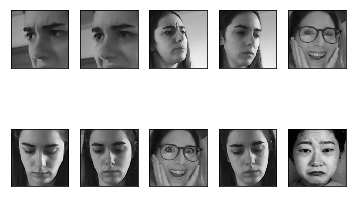

In [ ]:
x_imgs=data['X']
j=0
for i in ind[0]:
    ax = plt.subplot(2, 5, j + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    j+=1
    plt.imshow(x_imgs[i][:,:,::-1])

<function matplotlib.pyplot.show(*args, **kw)>

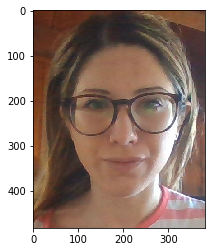

In [ ]:
img_query2=kimage.load_img('C:/Users/valen/Desktop/magistrale/DSIM/vale2.jpg')
plt.imshow(img_query2); plt.show

In [ ]:
img_query2_ex = fe_query(img_query2)
img_query2_ex.shape

(1, 2048)

In [ ]:
dist, ind = tree1.query(img_query2_ex, k=10)

In [ ]:
dist

array([[286.45663126, 300.25249897, 304.29159505, 307.91768958,
        310.08776652, 311.21407032, 313.08737368, 313.16156059,
        316.27091282, 316.43821895]])

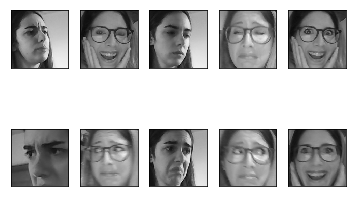

In [ ]:
j=0
for i in ind[0]:
    ax = plt.subplot(2, 5, j + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    j+=1
    plt.imshow(x_imgs[i][:,:,::-1])

We try with different cut of vggface for feature extraction.

In [ ]:
def feature_extraction(img):
    img=img.astype('float64')
    img=preprocess_input(img,version=2)
    model = Model(inputs = net.input, outputs = net.get_layer('global_average_pooling2d_15').output)
    f=model.predict(img)
    return f

In [ ]:
def fe_query2(img):
    x=kimage.img_to_array(img)
    x=preprocess_input(x,version=2)
    x= np.expand_dims(x, axis=0)
    x= np.resize(x, [1, 224, 224, 3])
    model = Model(inputs = net.input, outputs = net.get_layer('global_average_pooling2d_15').output)
    x=model.predict(x)
    return x

In [ ]:
features_data= feature_extraction(img)
img_query_ex = fe_query2(img_query)
img_query_ex.shape; features_data.shape

(2269, 2048)

In [ ]:
tree2= KDTree(features_data)
dist, ind = tree2.query(img_query_ex, k=10)
dist

array([[10.25959874, 10.3173934 , 10.39222516, 10.40389036, 10.42076762,
        10.46955345, 10.47888065, 10.4923213 , 10.49403289, 10.57586497]])

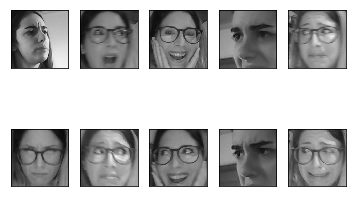

In [ ]:
j=0
for i in ind[0]:
    ax = plt.subplot(2, 5, j + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    j+=1
    plt.imshow(x_imgs[i][:,:,::-1])

In [ ]:
img_query_ex2 = fe_query2(img_query2)
img_query_ex2.shape
dist, ind = tree2.query(img_query_ex2, k=10)
dist

array([[10.13687271, 10.98195354, 10.98711754, 10.99933906, 11.05750763,
        11.0997277 , 11.15264184, 11.20500937, 11.24632723, 11.25199337]])

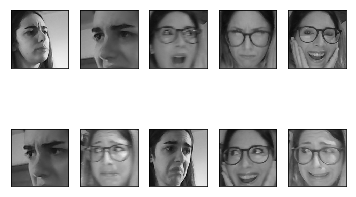

In [ ]:
j=0
for i in ind[0]:
    ax = plt.subplot(2, 5, j + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    j+=1
    plt.imshow(x_imgs[i][:,:,::-1])

We now test an image included into our dataset.

<function matplotlib.pyplot.show(*args, **kw)>

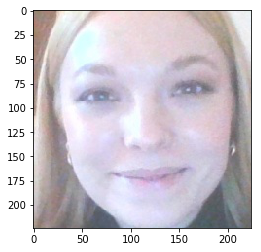

In [ ]:
img_query3=kimage.load_img('C:/Users/valen/Desktop/magistrale/DSIM/fra.jpg')
plt.imshow(img_query3); plt.show

In [ ]:
img_query_ex3 = fe_query(img_query3)
img_query_ex3.shape
dist, ind = tree1.query(img_query_ex3, k=10)
dist

array([[17.8830504 , 23.13499519, 25.70032474, 27.33253416, 27.38119799,
        27.52148359, 27.7965877 , 28.20892344, 28.53990867, 28.66237829]])

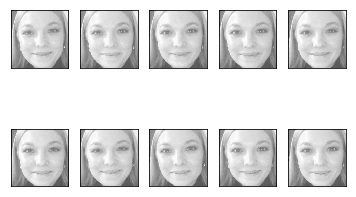

In [ ]:
j=0
for i in ind[0]:
    ax = plt.subplot(2, 5, j + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    j+=1
    plt.imshow(x_imgs[i][:,:,::-1])

In [ ]:
img_query_ex3 = fe_query2(img_query3)
img_query_ex3.shape
dist, ind = tree2.query(img_query_ex3, k=10)
dist

array([[0.9669929 , 1.06243481, 1.10034553, 1.11580554, 1.1190619 ,
        1.12245642, 1.13298127, 1.13944425, 1.14723759, 1.1475187 ]])

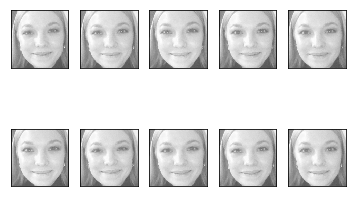

In [ ]:
j=0
for i in ind[0]:
    ax = plt.subplot(2, 5, j + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    j+=1
    plt.imshow(x_imgs[i][:,:,::-1])

Two model with two different cut for feature extraction can take same result with our new image, but *tree_2* had less value of distances with an image extract directly from our dataset. We save this model.

In [ ]:
joblib.dump(tree2, 'retrieval_model.joblib')

['retrieval_model.joblib']